In [152]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [153]:
data = pd.read_csv('chapter6/CH06PR05.txt',  header=None, sep='\s+')

In [154]:
data.rename({0:"Y", 1: "X_1", 2: "X_2"}, axis='columns', inplace=True)

In [155]:
data.head()

,Y,X_1,X_2
0,64.0,4.0,2.0
1,73.0,4.0,4.0
2,61.0,4.0,2.0
3,76.0,4.0,4.0
4,72.0,6.0,2.0


In [156]:
def get_ssr(model):
    return np.sum((model.fittedvalues - np.mean(model.model.endog))**2)
# Fit models for 2 predictors
model1 = smf.ols('Y ~ X_1', data=data).fit()
model2 = smf.ols('Y ~ X_2', data=data).fit()
model12 = smf.ols('Y ~ X_1 + X_2', data=data).fit()
model1times2 = smf.ols('Y ~ X_1:X_2', data=data).fit()
# Calculate sums of squares
ssr_x1 = get_ssr(model1)  # SSR(X₁)
ssr_x2 = get_ssr(model2)  # SSR(X₂)
ssr_x1_x2 = get_ssr(model12)  # SSR(X₁,X₂)

# Calculate extra sums of squares
ssr_x2_given_x1 = ssr_x1_x2 - ssr_x1  # SSR(X₂|X₁)
ssr_x1_given_x2 = ssr_x1_x2 - ssr_x2  # SSR(X₁|X₂)

# Calculate error sums of squares
sse_x1 = np.sum(model1.resid**2)  # SSE(X₁)
sse_x2 = np.sum(model2.resid**2)  # SSE(X₂)
sse_x1_x2 = np.sum(model12.resid**2)  # SSE(X₁,X₂)

# Calculate total sum of squares
sst = np.sum((data['Y'] - np.mean(data['Y']))**2)  # SST()

# Calculate R² values
r_squared_y1 = ssr_x1 / sst  # R²ᵧ₁ = SSR(X₁)/SST()
r_squared_y2 = ssr_x2 / sst  # R²ᵧ₂ = SSR(X₂)/SST()
r_squared_y1_given_x2 = ssr_x1_given_x2 / sse_x2  # R²ᵧ₁|₂ = SSR(X₁|X₂)/SSE(X₂)
r_squared_y2_given_x1 = ssr_x2_given_x1 / sse_x1  # R²ᵧ₂|₁ = SSR(X₂|X₁)/SSE(X₁)

# Calculate R₁₂ using the correlation between X₁ and X₂
r_12 = np.corrcoef(data['X_1'], data['X_2'])[0, 1]
r_squared_12 = r_12**2  # R₁₂ = r²₁₂

print("\nR-squared values:")
print(f"R²ᵧ₁ = {r_squared_y1:.4f}")
print(f"R²ᵧ₂ = {r_squared_y2:.4f}")
print(f"R²ᵧ₁|₂ = {r_squared_y1_given_x2:.4f}")
print(f"R²ᵧ₂|₁ = {r_squared_y2_given_x1:.4f}")
print(f"R²₁₂ = {r_squared_12:.4f}")
r_squared_total = model12.rsquared  
print(f"Total R² (both X₁ and X₂): {r_squared_total:.4f}")


R-squared values:
R²ᵧ₁ = 0.7964
R²ᵧ₂ = 0.1557
R²ᵧ₁|₂ = 0.9432
R²ᵧ₂|₁ = 0.7646
R²₁₂ = 0.0000
Total R² (both X₁ and X₂): 0.9521


In [157]:
model12 = smf.ols('Y ~ X_1:X_2', data=data).fit()
model12.summary()

/Users/pedro/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           2.27e-05
Time:                        16:51:29   Log-Likelihood:                -50.610
No. Observations:                  16   AIC:                             105.2
Df Residuals:                      14   BIC:                             106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.7045      3.571     17.279      0.000      54.045      69.364
X_1:X_2        0.9545      0.154      6.211      0.000       0.625       1.284
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                1.984
Skew:                           0.857   Prob(JB):                        0.371
Kurtosis:                       2.806   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
data2 = pd.read_csv('CH01PR27.txt',  header=None, sep='\s+')

In [159]:
data2.head()

,0,1
0,106,43
1,106,41
2,97,47
3,113,46
4,96,45


In [160]:
data2.rename({0:"Y", 1: "X_1"}, axis='columns', inplace=True)

In [161]:
model2 = smf.ols('Y ~ X_1 + I(X_1**2)', data=data2).fit()

In [162]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     91.84
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.48e-18
Time:                        16:51:31   Log-Likelihood:                -208.56
No. Observations:                  60   AIC:                             423.1
Df Residuals:                      57   BIC:                             429.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     207.3496     29.225      7.095      0.000     148.827     265.872
X_1            -2.9643      1.003     -2.955      0.005      -4.973      -0.956
I(X_1 ** 2)     0.0148      0.008      1.776      0.081      -0.002       0.032
==============================================================================
Omnibus:                        1.630   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                1.395
Skew:                           0.214   Prob(JB):                        0.498
Kurtosis:                       2.387   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Quadratic Regression: Y ~ X_1 + X_1²')

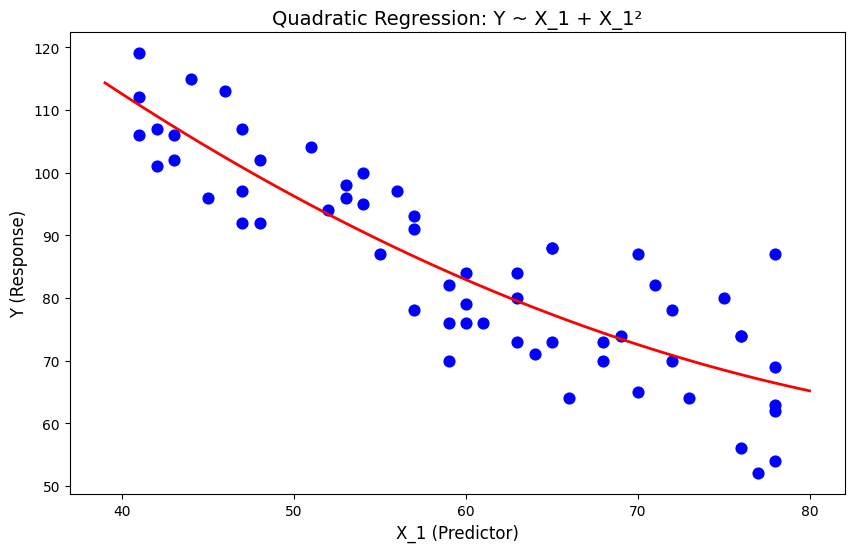

In [163]:


x_range = np.linspace(min(data2['X_1']) - 2, max(data2['X_1']) + 2, 100)

pred_df = pd.DataFrame({'X_1': x_range})

y_pred = model2.predict(pred_df)


plt.figure(figsize=(10, 6))

plt.scatter(data2['X_1'], data2['Y'], color='blue', s=60, label='Original data')

plt.plot(x_range, y_pred, color='red', linewidth=2, label='Fitted quadratic curve')
plt.xlabel('X_1 (Predictor)', fontsize=12)
plt.ylabel('Y (Response)', fontsize=12)
plt.title('Quadratic Regression: Y ~ X_1 + X_1²', fontsize=14)

In [164]:
model2.rsquared


np.float64(0.7631706631364434)

In [165]:
import statsmodels.api as sm
# Assuming you've already fit the model:
# model2 = smf.ols('Y ~ X_1 + I(X_1**2)', data=data).fit()

# Print the hypotheses being tested
print("Hypotheses for Testing Regression Relationship:")
print("H₀ (Null Hypothesis): There is no significant regression relationship (β₁ = β₂ = 0)")
print("H₁ (Alternative Hypothesis): There is a significant regression relationship (at least one βᵢ ≠ 0)")
print("\n" + "-"*70)

# Test for regression relationship
print("\nANOVA Table:")
anova_table = sm.stats.anova_lm(model2)
print(anova_table)

# Extract F-statistic and p-value
f_statistic = anova_table.loc['X_1', 'F']  # This may differ depending on your statsmodels version
p_value = anova_table.loc['X_1', 'PR(>F)']  # This may differ depending on your statsmodels version

# Alternative approach to get the overall F-test
print("\nModel Summary:")
print(model2.summary())

# Extract overall F-statistic and p-value
overall_f = model2.fvalue
overall_p = model2.f_pvalue

print("\nF-Test for Regression Relationship:")
print(f"F-statistic: {overall_f:.4f}")
print(f"p-value: {overall_p:.4e}")

# Decision rule
alpha = 0.05
if overall_p < alpha:
    conclusion = "Reject the null hypothesis"
else:
    conclusion = "Fail to reject the null hypothesis"

print(f"\nAt α = {alpha}:")
print(f"Decision rule: Reject H₀ if p-value < {alpha}")
print(f"Decision: {conclusion}")


Hypotheses for Testing Regression Relationship:
H₀ (Null Hypothesis): There is no significant regression relationship (β₁ = β₂ = 0)
H₁ (Alternative Hypothesis): There is a significant regression relationship (at least one βᵢ ≠ 0)

----------------------------------------------------------------------

ANOVA Table:
               df        sum_sq       mean_sq           F        PR(>F)
X_1           1.0  11627.485835  11627.485835  180.525814  2.594561e-19
I(X_1 ** 2)   1.0    203.134907    203.134907    3.153828  8.108690e-02
Residual     57.0   3671.312591     64.408993         NaN           NaN

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     91.84
Date:                Wed, 26 Feb 2025   Prob (F-statistic):     

In [166]:
new_data = pd.DataFrame({'X_1': [48]})
pred = model2.get_prediction(new_data)
prediction_summary = pred.summary_frame(alpha=0.05)
prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,99.254612,1.483295,96.284364,102.224859,82.911603,115.59762


In [167]:
modelreduced = smf.ols(formula="Y ~ X_1", data=data2).fit()

ssr_interaction = get_ssr(model2) - get_ssr(modelreduced)

df_interaction = model2.df_model - modelreduced.df_model  


ms_interaction = ssr_interaction / df_interaction

mse_full = model2.mse_resid  

F_star = ms_interaction / mse_full

df_error = model2.df_resid


print(f"SSR (Interaction): {ssr_interaction:.4f}")
print(f"Degrees of Freedom (Interaction): {df_interaction}")
print(f"Mean Square (Interaction): {ms_interaction:.4f}")
print(f"Mean Square Error (Full Model): {mse_full:.4f}")
print(f"F-statistic: {F_star:.4f}")

from scipy.stats import f
p_value = 1 - f.cdf(F_star, df_interaction, df_error)
print(f"P-value: {p_value:.4e}")


SSR (Interaction): 203.1349
Degrees of Freedom (Interaction): 1.0
Mean Square (Interaction): 203.1349
Mean Square Error (Full Model): 64.4090
F-statistic: 3.1538
P-value: 8.1087e-02


In [168]:
# F-statistic calculation
print(f"F-statistic: {F_star:.4f}")

# Decision Rule
alpha = 0.05  # Common significance level
critical_F = f.ppf(1-alpha, df_interaction, df_error)
print(f"Critical F-value (α = 0.05): {critical_F:.4f}")
print(f"Decision Rule: Reject H₀ if F* > {critical_F:.4f}")

# Conclusion
if F_star > critical_F:
    print(f"Decision: Reject H₀ (F* = {F_star:.4f} > {critical_F:.4f})")
    print("Conclusion: The interaction term is statistically significant")
    print("and should be included in the model.")
else:
    print(f"Decision: Fail to reject H₀ (F* = {F_star:.4f} ≤ {critical_F:.4f})")
    print("Conclusion: The interaction term is not statistically significant")
    print("and may be omitted from the model for parsimony.")

F-statistic: 3.1538
Critical F-value (α = 0.05): 4.0099
Decision Rule: Reject H₀ if F* > 4.0099
Decision: Fail to reject H₀ (F* = 3.1538 ≤ 4.0099)
Conclusion: The interaction term is not statistically significant
and may be omitted from the model for parsimony.


In [169]:
data2['X_1_squared'] = data2['X_1']**2
corr_X_Xsq = np.corrcoef(data2['X_1'], data2['X_1_squared'])[0,1]

# 2. Calculate correlation between centered x and centered x²
# Centering X_1
data2['little_x'] = data2['X_1'] - data2['X_1'].mean()
data2['little_x_squared'] = data2['little_x']**2
corr_x_xsq = np.corrcoef(data2['little_x'], data2['little_x_squared'])[0,1]
print(f"Correlation between X_1 and X_1²: {corr_X_Xsq:.6f}")
print(f"Correlation between centered x and x²: {corr_x_xsq:.6f}")

Correlation between X_1 and X_1²: 0.996094
Correlation between centered x and x²: -0.038357


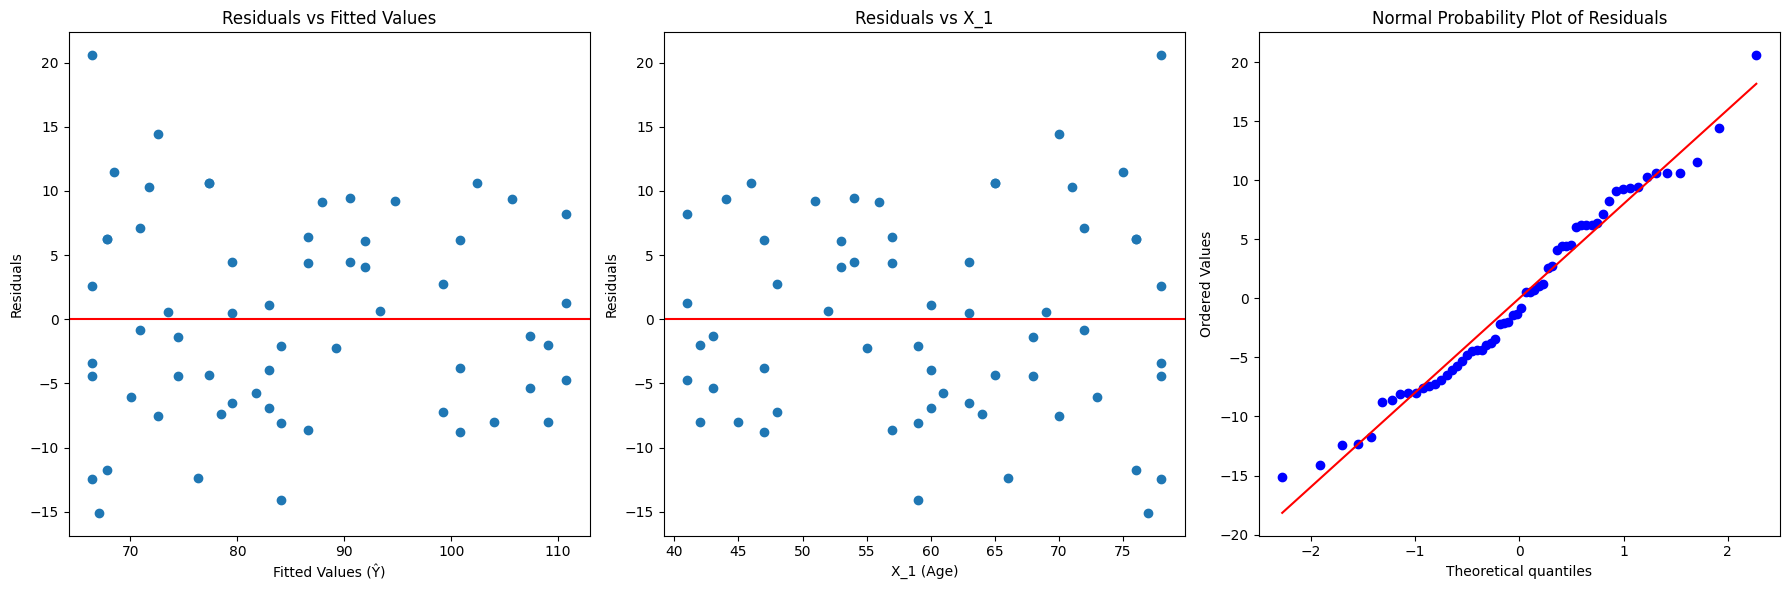

Residual Statistics:
Mean of residuals: 0.000000
Standard deviation of residuals: 7.822311
Shapiro-Wilk test for normality: ShapiroResult(statistic=np.float64(0.9766578042479964), pvalue=np.float64(0.303909832239134))


In [170]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Get residuals from the model
residuals = model2.resid
fitted_values = model2.fittedvalues
x_values = data2['X_1']

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Residuals vs Fitted Values
axes[0].scatter(fitted_values, residuals)
axes[0].axhline(y=0, color='r', linestyle='-')
axes[0].set_xlabel('Fitted Values (Ŷ)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values')

# Plot 2: Residuals vs X
axes[1].scatter(x_values, residuals)
axes[1].axhline(y=0, color='r', linestyle='-')
axes[1].set_xlabel('X_1 (Age)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs X_1')

# Plot 3: Normal Probability Plot
stats.probplot(residuals, plot=axes[2])
axes[2].set_title('Normal Probability Plot of Residuals')

plt.tight_layout()
plt.show()

# Basic residual statistics
print("Residual Statistics:")
print(f"Mean of residuals: {np.mean(residuals):.6f}")
print(f"Standard deviation of residuals: {np.std(residuals):.6f}")
print(f"Shapiro-Wilk test for normality: {stats.shapiro(residuals)}")

In [172]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Assuming model2 is already fitted and data is available

# Step 1: Get the residuals and fitted values
residuals = model2.resid
fitted_values = model2.fittedvalues
X_values = data['X_1']

# Step 2: Group the data by unique X values for pure error calculation
groups = data.groupby('X_1')

# Calculate SSE (Sum of Squares Error) from the model
SSE = sum(residuals**2)
df_e = len(data) - model2.df_model - 1  # degrees of freedom for error

# Calculate SSPE (Sum of Squares Pure Error)
SSPE = 0
df_pe = 0

for name, group in groups:
    if len(group) > 1:  # only groups with replications contribute to pure error
        y_group = group['Y']
        SSPE += sum((y_group - y_group.mean())**2)
        df_pe += len(group) - 1

# Calculate SSLF (Sum of Squares Lack of Fit)
SSLF = SSE - SSPE
df_lf = df_e - df_pe

# Calculate mean squares
MSLF = SSLF / df_lf if df_lf > 0 else np.nan
MSPE = SSPE / df_pe if df_pe > 0 else np.nan

# Calculate F-statistic
F_stat = MSLF / MSPE if MSPE > 0 else np.nan

# Find critical F-value at 5% significance level
alpha = 0.05
F_crit = stats.f.ppf(1-alpha, df_lf, df_pe)
p_value = 1 - stats.f.cdf(F_stat, df_lf, df_pe)

# Print results
print("\nLack of Fit Test for Quadratic Regression Model")
print("\nHypotheses:")
print("H₀: The quadratic regression function is correctly specified")
print("H₁: The quadratic regression function is not correctly specified")

print("\nTest Statistics:")
print(f"F-statistic: {F_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical F-value (α = {alpha}): {F_crit:.4f}")

print("\nDecision Rule:")
print(f"Reject H₀ if F > {F_crit:.4f} or if p-value < {alpha}")

# Conclusion
if p_value < alpha or F_stat > F_crit:
    print("\nDecision: Reject H₀")
    print("Conclusion: There is significant evidence of lack of fit.")
    print("The quadratic model does not adequately describe the relationship.")
else:
    print("\nDecision: Fail to reject H₀")
    print("Conclusion: There is insufficient evidence of lack of fit.")
    print("The quadratic model adequately describes the relationship.")


Lack of Fit Test for Quadratic Regression Model

Hypotheses:
H₀: The quadratic regression function is correctly specified
H₁: The quadratic regression function is not correctly specified

Test Statistics:
F-statistic: 102.2821
p-value: 0.0000
Critical F-value (α = 0.05): 4.7472

Decision Rule:
Reject H₀ if F > 4.7472 or if p-value < 0.05

Decision: Reject H₀
Conclusion: There is significant evidence of lack of fit.
The quadratic model does not adequately describe the relationship.


In [173]:
model3 = smf.ols('Y ~ X_1 + I(X_1**2) + I(X_1**3)', data=data2).fit()

In [177]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     60.34
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.52e-17
Time:                        17:29:13   Log-Likelihood:                -208.49
No. Observations:                  60   AIC:                             425.0
Df Residuals:                      56   BIC:                             433.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     140.3731    187.735      0.748      0.458    -235.706     516.452
X_1             0.5648      9.822      0.058      0.954     -19.111      20.240
I(X_1 ** 2)    -0.0456      0.168     -0.272      0.786      -0.381       0.290
I(X_1 ** 3)     0.0003      0.001      0.361      0.719      -0.002       0.002
==============================================================================
Omnibus:                        1.528   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.314
Skew:                           0.195   Prob(JB):                        0.519
Kurtosis:                       2.389   Cond. No.                     4.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# Assuming model3 is already fit as shown in your code
import numpy as np
import scipy.stats as stats

# Extract coefficient for the cubic term
cubic_coef = model3.params['I(X_1 ** 3)']
cubic_std_error = model3.bse['I(X_1 ** 3)']

# Calculate t-statistic
t_stat = cubic_coef / cubic_std_error

# Get degrees of freedom and p-value
degrees_of_freedom = model3.df_resid
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), degrees_of_freedom))

# Set significance level
alpha = 0.05

# Calculate critical t-value
critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

# Print hypothesis test information
print("Testing H₀: β₁₁₁ = 0 vs. H₁: β₁₁₁ ≠ 0")
print(f"Cubic term coefficient (β₁₁₁): {cubic_coef:.6f}")
print(f"Standard error: {cubic_std_error:.6f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical t-value (α = {alpha}): {critical_t:.4f}")
print("\nDecision rule: Reject H₀ if |t-statistic| > {:.4f}".format(critical_t))

# Make decision and state conclusion
if abs(t_stat) > critical_t:
    print("\nDecision: Reject H₀")
    print("Conclusion: There is significant evidence that the cubic term is needed in the model (β₁₁₁ ≠ 0).")
else:
    print("\nDecision: Fail to reject H₀")
    print("Conclusion: There is insufficient evidence that the cubic term is needed in the model.")

# Alternative approach using model's summary output
print("\nAlternative approach using model summary:")
print(model3.summary().tables[1])  # Display the coefficients table from summary

Testing H₀: β₁₁₁ = 0 vs. H₁: β₁₁₁ ≠ 0
Cubic term coefficient (β₁₁₁): 0.000337
Standard error: 0.000933
t-statistic: 0.3612
p-value: 0.7193
Critical t-value (α = 0.05): 2.0032

Decision rule: Reject H₀ if |t-statistic| > 2.0032

Decision: Fail to reject H₀
Conclusion: There is insufficient evidence that the cubic term is needed in the model.

Alternative approach using model summary:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     140.3731    187.735      0.748      0.458    -235.706     516.452
X_1             0.5648      9.822      0.058      0.954     -19.111      20.240
I(X_1 ** 2)    -0.0456      0.168     -0.272      0.786      -0.381       0.290
I(X_1 ** 3)     0.0003      0.001      0.361      0.719      -0.002       0.002


In [139]:
data_q20 = pd.read_csv('CH01PR19.txt', sep='\s+', header=None)
additional_data = pd.read_csv('Chapter  8 Data Sets/CH08PR16.txt', sep='\s+', header=None)
data_q20 = pd.concat([data_q20, additional_data], axis="columns")

In [140]:
data_q20.head()

,0,1,0
0,3.897,21,0
1,3.885,14,1
2,3.778,28,0
3,2.540,22,1
4,3.028,21,0


In [141]:
data_q20.columns = ["Y", "X_1", "X_2"]

In [142]:
data_q20

,Y,X_1,X_2
0,3.897,21,0
1,3.885,14,1
2,3.778,28,0
3,2.540,22,1
4,3.028,21,0
...,...,...,...
115,3.885,20,1
116,3.800,29,0
117,3.914,28,1
118,1.860,16,1


In [143]:
modelinteraction = smf.ols(formula="Y ~ X_1 + X_2 + X_1*X_2", data=data_q20).fit()

In [144]:
modelinteraction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     5.244
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00198
Time:                        16:30:46   Log-Likelihood:                -109.40
No. Observations:                 120   AIC:                             226.8
Df Residuals:                     116   BIC:                             237.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2263      0.549      5.872      0.000       2.138       4.315
X_1           -0.0028      0.021     -0.129      0.898      -0.045       0.040
X_2           -1.6496      0.672     -2.454      0.016      -2.981      -0.318
X_1:X_2        0.0622      0.026      2.350      0.020       0.010       0.115
==============================================================================
Omnibus:                       28.768   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.541
Skew:                          -0.948   Prob(JB):                     1.59e-14
Kurtosis:                       6.019   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:


modelinteraction = smf.ols(formula="Y ~ X_1 + X_2 + X_1*X_2", data=data_q20).fit()

modelreduced = smf.ols(formula="Y ~ X_1 + X_2", data=data_q20).fit()

ssr_interaction = get_ssr(modelinteraction) - get_ssr(modelreduced)

df_interaction = modelinteraction.df_model - modelreduced.df_model  


ms_interaction = ssr_interaction / df_interaction

mse_full = modelinteraction.mse_resid  

F_star = ms_interaction / mse_full

df_error = modelinteraction.df_resid


print(f"SSR (Interaction): {ssr_interaction:.4f}")
print(f"Degrees of Freedom (Interaction): {df_interaction}")
print(f"Mean Square (Interaction): {ms_interaction:.4f}")
print(f"Mean Square Error (Full Model): {mse_full:.4f}")
print(f"F-statistic: {F_star:.4f}")

from scipy.stats import f
p_value = 1 - f.cdf(F_star, df_interaction, df_error)
print(f"P-value: {p_value:.4e}")


SSR (Interaction): 2.0713
Degrees of Freedom (Interaction): 1.0
Mean Square (Interaction): 2.0713
Mean Square Error (Full Model): 0.3750
F-statistic: 5.5226
P-value: 2.0461e-02


In [146]:
# F-statistic calculation
print(f"F-statistic: {F_star:.4f}")

# Decision Rule
alpha = 0.05  # Common significance level
critical_F = f.ppf(1-alpha, df_interaction, df_error)
print(f"Critical F-value (α = 0.05): {critical_F:.4f}")
print(f"Decision Rule: Reject H₀ if F* > {critical_F:.4f}")

# Conclusion
if F_star > critical_F:
    print(f"Decision: Reject H₀ (F* = {F_star:.4f} > {critical_F:.4f})")
    print("Conclusion: The interaction term is statistically significant")
    print("and should be included in the model.")
else:
    print(f"Decision: Fail to reject H₀ (F* = {F_star:.4f} ≤ {critical_F:.4f})")
    print("Conclusion: The interaction term is not statistically significant")
    print("and may be omitted from the model for parsimony.")

F-statistic: 5.5226
Critical F-value (α = 0.05): 3.9229
Decision Rule: Reject H₀ if F* > 3.9229
Decision: Reject H₀ (F* = 5.5226 > 3.9229)
Conclusion: The interaction term is statistically significant
and should be included in the model.
